## 결측치에 대해서는 어떤 식으로 접근해야 하는가
- 결측치는 누락값, 비어있는 값이다.
- 휴먼 에러에 의해 누락값이 발생하며, 그 누락값이 맞는 경우도 있다.
- 결측치, 누락값은 컬럼과 데이터의 관계에 대해서도 잘 이해하고 살펴야 한다.

### 누락값, 결측치를 대처하는 자세
#### 2가지 형태
- 1) 날려서 삭제한다 - 누락값을 지운다.(단, 언제, 어떤 경우에 와 같은 기준이 필요하다.)
- 2) 값을 대체한다 - 값을 채운다.(단, 어떤 값으로?, 왜? 어떻게 와 같은 기준이 필요하다.)
- 2가지의 답은 해당 데이터 컬럼과 데이터의 관계에 따라 다를 수 잇고, 데이터 분석가의 도메인 지식이 매우 중요하다.

In [30]:
import pandas as pd
import numpy as np

In [54]:
df = pd.DataFrame({'이름':['송우기','김민니','예슈화'],
                  '성적':[60,np.nan,35],
                  '등급':['B','D',np.nan]})

In [50]:
df

,이름,성적,등급
0,송우기,60.0,B
1,김민니,NaN,D
2,예슈화,35.0,NaN


In [33]:
# np값 결측치 missing value는 어떻게 보아야 하는가?
df.isna().sum()

이름    0
성적    1
등급    1
dtype: int64

#### 누락값, 결측치 날리는 방법 중 첫번째 방법
- df.dropna(sumset=['컬럼'])

In [34]:
df.dropna(subset=['성적']) # 성적 컬럼에 결측치, 누락값이 존재하면 그 값을 날린다.

,이름,성적,등급
0,송우기,60.0,B
2,예슈화,35.0,NaN


In [35]:
df.dropna() 
# sumset(['컬럼']) 지정 안해주면 전체 값 다 날림(결측치, 누락값 관련)
# 지금은 컬럼이 1개만 na값이라 동일한 결과처럼 보이지만
# 컬럼이 많이지면 내가 날리고싶지 않은 값들 까지도 다 날라간.

,이름,성적,등급
0,송우기,60.0,B


### 결측치 대체 =  값을 채운다는 뜻이다.

In [40]:
df

,이름,성적,등급
0,송우기,60.0,B
1,김민니,75.0,D
2,예슈화,35.0,NaN


### 성적에 대해서 na값을 대체해보자
- 성적에 있는 na값을 대체 값으로 넣어야하는데 그 방법은
- fillna()로 na 값을 채우는 방법이다.

In [37]:
df['성적']=df['성적'].fillna(75) # 값을 넣을 수 있다.

In [38]:
df

,이름,성적,등급
0,송우기,60.0,B
1,김민니,75.0,D
2,예슈화,35.0,NaN


In [44]:
df_mean=df.성적.mean()

In [45]:
df_mean

47.5

In [47]:
df['성적']=df['성적'].fillna(df_mean) # 변수화 또한 넣을 수 있다.

In [48]:
df

,이름,성적,등급
0,송우기,60.0,B
1,김민니,47.5,D
2,예슈화,35.0,NaN


In [52]:
df['성적']= df['성적'].fillna((50+30)/2)# 식으로 역시 가능하다.

In [53]:
df

,이름,성적,등급
0,송우기,60.0,B
1,김민니,40.0,D
2,예슈화,35.0,NaN


#### na값에 대한 통계치 계산
- 통계치를 구할 때 na값은 반영이 안 된다.
- 값의 개수를 셀 때 na값은 반영이 안 된다.

In [56]:
import seaborn as sns
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
np.mean(df['age']) #넘파이를 감싸주는 것 

29.69911764705882

In [58]:
df.age.mean() #반영 안 된 2개의 평균

29.69911764705882

In [61]:
df.shape # 891개의 rows 값과, 15 개의 columns

(891, 15)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [63]:
df.isna().sum() # 결측치 확인작업

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [64]:
df.age # 나이값 정렬

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [65]:
df.embarked.value_counts() # 각 선실 등급 몇개인지 수치카운팅

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [66]:
df['embarked'].value_counts() # 각 선실 등급 몇개인지 수치카운팅

S    644
C    168
Q     77
Name: embarked, dtype: int64

### 수치형 데이터와 문자형 데이터의 결측치를 대처하는 방법은 다 다르다.
- 문자형 데이터는 가장 많이 나오는 값으로 대체 가능하고, 분석가의 도메인에 따라 다르게 대처할 수 있다.
- 수치형 데이터는 평균값, 전 값과 비교해서 대체할 수 있고, 두 값 사이에 대한 평균값으로 대체 가능하다.
- 보간법의 개념과 유사한 형태를 지닌다.

### 결측치들이 존재한다면?
- 우선적으로 시각화를 통해서 분포를 확인해 보는 것이 좋다.

In [69]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### - 결측치를 채울 떄는 결국엔 모든 과정들이 머신에게 학습을 시키기 위한 과정이기에 머신에게 학습하기 위해서는 결국 그 피처에 대한 특성을 정확하게 설명해주는 것이 매우 중요하다.

### - 피처는 결국 Y값 라벨에 대한 값과 어떤 관계가 있는지가 대체할 때 중요한 포인트가 된다.

### - 이런것들을 시간화 해 보면서 인사이트를 도출하고 다양한 분석가들과 이야기를 나누는 것이 중요하다

## - sns를 이용하여 시각화 하는 방법

<AxesSubplot:xlabel='sex', ylabel='survived'>

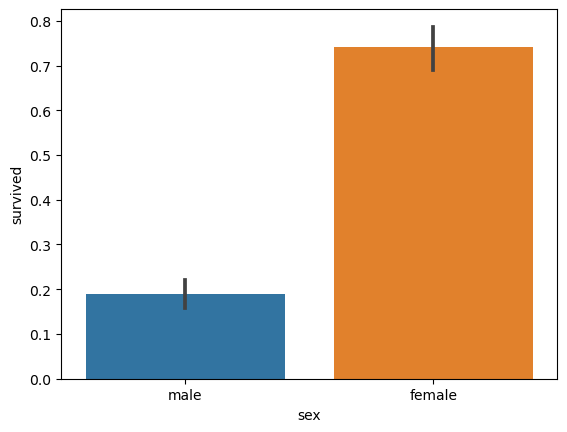

In [70]:
sns.barplot(x='sex', y='survived', data=df)

<AxesSubplot:xlabel='pclass', ylabel='survived'>

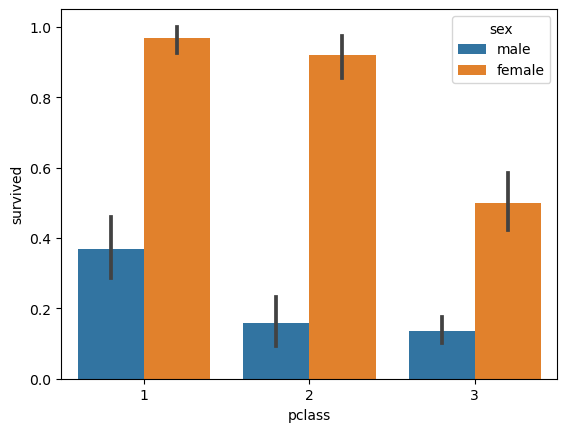

In [72]:
sns.barplot(x='pclass', y='survived', hue='sex',data= df)

<AxesSubplot:xlabel='class', ylabel='survived'>

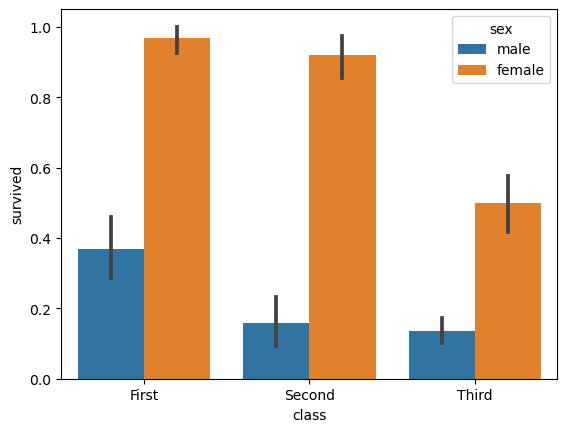

In [73]:
sns.barplot(x='class', y='survived', hue='sex',data= df)

- 어떤 피처가 어떤 특성으로 y값과 패턴을 보이느냐 이런 것들이 결국 결측치를 대처할 때 중요한 방법 중 하나이다( 이것이 인사이트를 얻는 방법과 같다. )

In [75]:
df['age'].max()

80.0

In [76]:
df['age'].min()

0.42

In [77]:
import matplotlib.pyplot as plt

In [78]:
group=['baby','child','student','Young adult','Adult','Elderly']

In [79]:
group

['baby', 'child', 'student', 'Young adult', 'Adult', 'Elderly']

In [85]:
def cat_age(age):
    cat = ''
    if age <=5 :cat ='baby'
    elif age <=18: cat='child'
    elif age <=30: cat='student'
    elif age <=40: cat='Young adult'
    elif age <=60: cat='Adult'
    else: cat ='Elderly'
    
    return cat

In [86]:
plt.figure(figsize=(15,10))
df['cat_age'] = df['age'].apply(lambda x:cat_age(x))

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:xlabel='cat_age', ylabel='survived'>

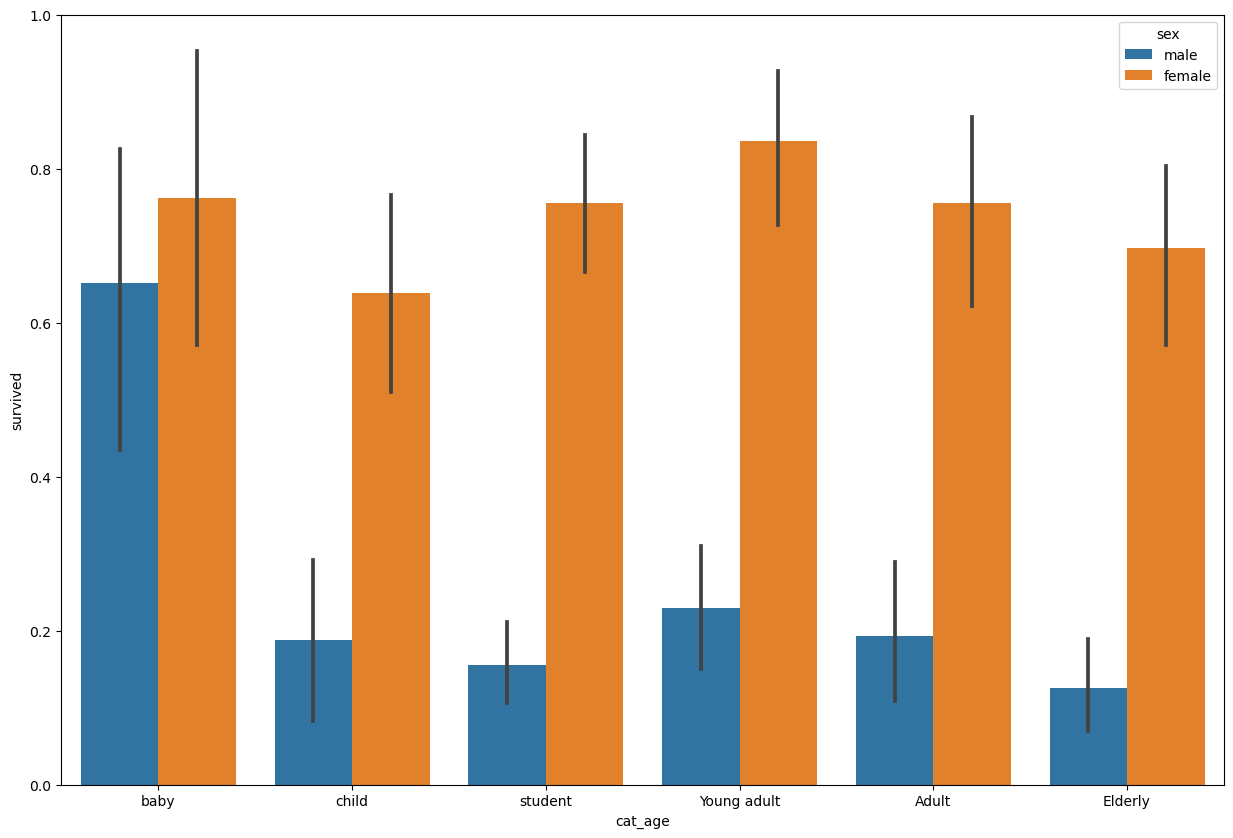

In [87]:
plt.figure(figsize=(15,10))
sns.barplot(x='cat_age',y='survived',hue='sex', data = df, order = group)

<AxesSubplot:>

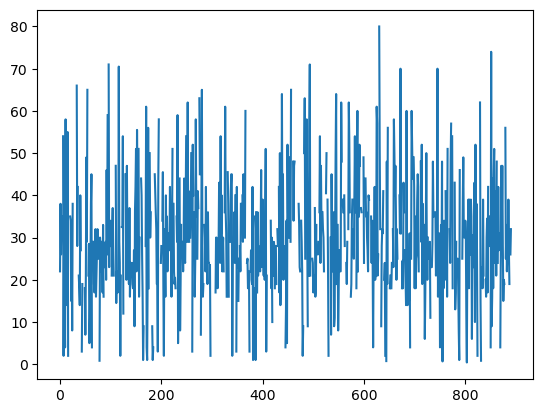

In [88]:
df.age.plot()

In [89]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,split_age,cat_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,student,student
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Young aduit,Young adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,student,student
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young aduit,Young adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young aduit,Young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,student,student
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,student,student
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Elderly,Elderly
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,student,student


- 머신러닝은 수치형 변수만 학습할 수 있다. (즉 숫자데이터만 학습가능하다.)

- 문자열, object는 학습 이 불가능 하다.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  split_age    891 non-null    object  
 16  cat_age      891 non-null    object  
dtypes: bool(2), category(2), float64(2), int64(4), object(7)
memory usage: 94

## 문자열 데이터를 -> 수치형 데이터로 바꿔야 한다!
- 인코딩
- 인코딩 , 원핫인코딩, 레이블인코딩
- 인코딩은 원핫으로 진행하게 된다.
- 원핫인코딩은 0과 1로 표현을 하는 것
- 레이블인코딩은 숫자데이터를 순서척도로 바꿔서 1,2,3,4,5,6... 숫자로  만드는 것

In [91]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder

## 원핫 인코딩
- 판다스에 제공해주는 함수 get_dummies 를 사용 쉽게 원핫인코딩 0과 1로 바꾼다.

In [93]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,split_age,cat_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,student,student
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Young aduit,Young adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,student,student
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young aduit,Young adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young aduit,Young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,student,student
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,student,student
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Elderly,Elderly
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,student,student


In [94]:
pd.get_dummies(df['sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1
